# Jakarta Air Quality Analysis (2010–2025)
This notebook explores Jakarta's air pollution trends over the past decade, focusing on **PM2.5**, **CO**, **NO₂**, **SO₂**, and **O₃** levels.

The goal is to:
- Understand how pollutant levels evolved over time.
- Identify unhealthy periods and their likely causes.
- Discuss policy implications and data-driven solutions for cleaner air.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (10, 5)
sns.set_palette('viridis')

In [28]:
# Load dataset
df = pd.read_csv('jakarta_air_quality_all.csv')

# Display top 5 rows
df.head()

,tanggal,stasiun,pm25,pm10,so2,co,o3,no2,max,critical,categori
0,2010-01-01,DKI1 (Bunderan HI),NaN,60.0,4.0,73.0,27.0,14.0,73.0,CO,SEDANG
1,2010-01-02,DKI1 (Bunderan HI),NaN,32.0,2.0,16.0,33.0,9.0,33.0,O3,BAIK
2,2010-01-03,DKI1 (Bunderan HI),NaN,27.0,2.0,19.0,20.0,9.0,27.0,PM10,BAIK
3,2010-01-04,DKI1 (Bunderan HI),NaN,22.0,2.0,16.0,15.0,6.0,22.0,PM10,BAIK
4,2010-01-05,DKI1 (Bunderan HI),NaN,25.0,2.0,17.0,15.0,8.0,25.0,PM10,BAIK


### Notes:
- The dataset contains monthly averages of AQI and key pollutants.
- Missing data for 2022 (excluded in analysis).
- Columns include: `Date`, `PM2.5`, `CO`, `NO2`, `SO2`, `O3`.

In [29]:
# Check missing values and data info
df.info()
df.isna().sum()

# Convert date column to datetime
df['tanggal'] = pd.to_datetime(df['tanggal'], errors='coerce')

# Drop rows with missing date and NaN
df = df.dropna(subset=['tanggal'])
df = df.dropna(subset=['pm25'])

# Sort by date
df = df.sort_values('tanggal')

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5538 entries, 0 to 5537
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   5538 non-null   object 
 1   stasiun   5537 non-null   object 
 2   pm25      1516 non-null   float64
 3   pm10      5223 non-null   float64
 4   so2       5408 non-null   float64
 5   co        5450 non-null   float64
 6   o3        5434 non-null   float64
 7   no2       5432 non-null   float64
 8   max       5537 non-null   float64
 9   critical  5534 non-null   object 
 10  categori  5538 non-null   object 
dtypes: float64(7), object(4)
memory usage: 476.1+ KB


,tanggal,stasiun,pm25,pm10,so2,co,o3,no2,max,critical,categori
4018,2021-01-01,DKI2 (Kelapa Gading),58.0,38.0,2.0,11.0,65.0,6.0,65.0,O3,SEDANG
4019,2021-01-02,DKI3 (Jagakarsa),86.0,58.0,15.0,22.0,38.0,5.0,86.0,PM25,SEDANG
4020,2021-01-03,DKI3 (Jagakarsa),93.0,64.0,14.0,20.0,35.0,5.0,93.0,PM25,SEDANG
4021,2021-01-04,DKI2 (Kelapa Gading),49.0,30.0,NaN,9.0,77.0,7.0,77.0,O3,SEDANG
4022,2021-01-05,DKI3 (Jagakarsa),89.0,59.0,15.0,19.0,42.0,7.0,89.0,PM25,SEDANG


**Cleaning Step Summary:**
- Converted the `Date` column to proper datetime format.
- Checked for missing or invalid data.

In [30]:
# Check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1516 entries, 4018 to 5537
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   tanggal   1516 non-null   datetime64[ns]
 1   stasiun   1515 non-null   object        
 2   pm25      1516 non-null   float64       
 3   pm10      1317 non-null   float64       
 4   so2       1495 non-null   float64       
 5   co        1495 non-null   float64       
 6   o3        1494 non-null   float64       
 7   no2       1503 non-null   float64       
 8   max       1516 non-null   float64       
 9   critical  1516 non-null   object        
 10  categori  1516 non-null   object        
dtypes: datetime64[ns](1), float64(7), object(3)
memory usage: 142.1+ KB


In [31]:
# Summary statistics of numeric columns
df.describe()

# Average pollutant levels
df[['pm25', 'pm10', 'so2', 'co', 'o3', 'no2']].mean().sort_values(ascending=False)

pm25    89.742084
pm10    56.164009
so2     40.036120
o3      34.595047
no2     22.205589
co      16.098997
dtype: float64

In [32]:
# Create new columns for year and month
df['year'] = df['tanggal'].dt.year
df['month'] = df['tanggal'].dt.month

# Group by month (mean of pollutants)
monthly_df = df.groupby(['year', 'month'])[['pm25', 'pm10', 'co', 'no2']].mean().reset_index()
monthly_df.head()

,year,month,pm25,pm10,co,no2
0,2021,1,65.612903,44.400000,14.709677,8.967742
1,2021,2,68.678571,44.392857,12.360000,13.750000
2,2021,3,87.935484,55.161290,13.935484,16.774194
3,2021,4,91.866667,60.000000,13.586207,19.833333
4,2021,5,90.741935,57.366667,11.481481,17.548387


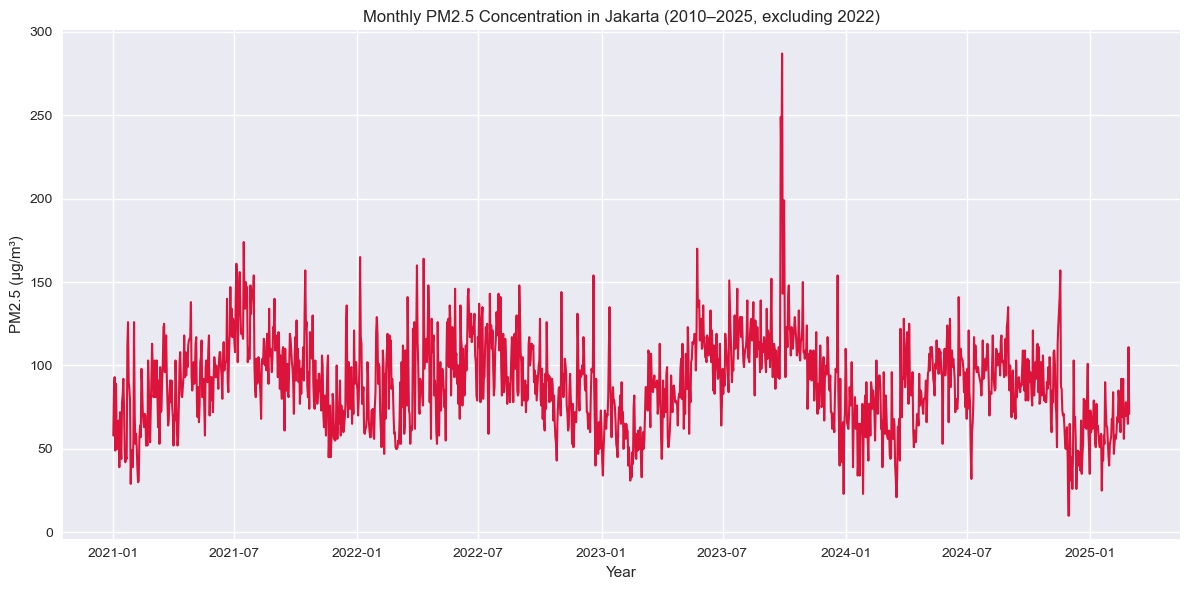

In [33]:
# Visual 1 – Monthly PM2.5 Trend
plt.figure(figsize=(12,6))
plt.plot(df['tanggal'], df['pm25'], color='crimson', linewidth=1.5)
plt.title('Monthly PM2.5 Concentration in Jakarta (2010–2025, excluding 2022)')
plt.xlabel('Year')
plt.ylabel('PM2.5 (µg/m³)')
plt.grid(True)
plt.tight_layout()

import os
os.makedirs('Project_data/visuals', exist_ok=True)

# Save the plot
plt.savefig('Project_data/visuals/monthly_trends.png', dpi=300)
plt.show()

### Insight:
- Notice recurring peaks during dry seasons (typically June–September).
- 2023 recorded the **worst PM2.5 spikes**, aligning with urban traffic surges and industrial output.


In [35]:
# Convert 'tanggal' column to datetime
df['tanggal'] = pd.to_datetime(df['tanggal'], errors='coerce')

# Set 'tanggal' as index
df.set_index('tanggal', inplace=True)

# Sort the index just in case
df = df.sort_index()

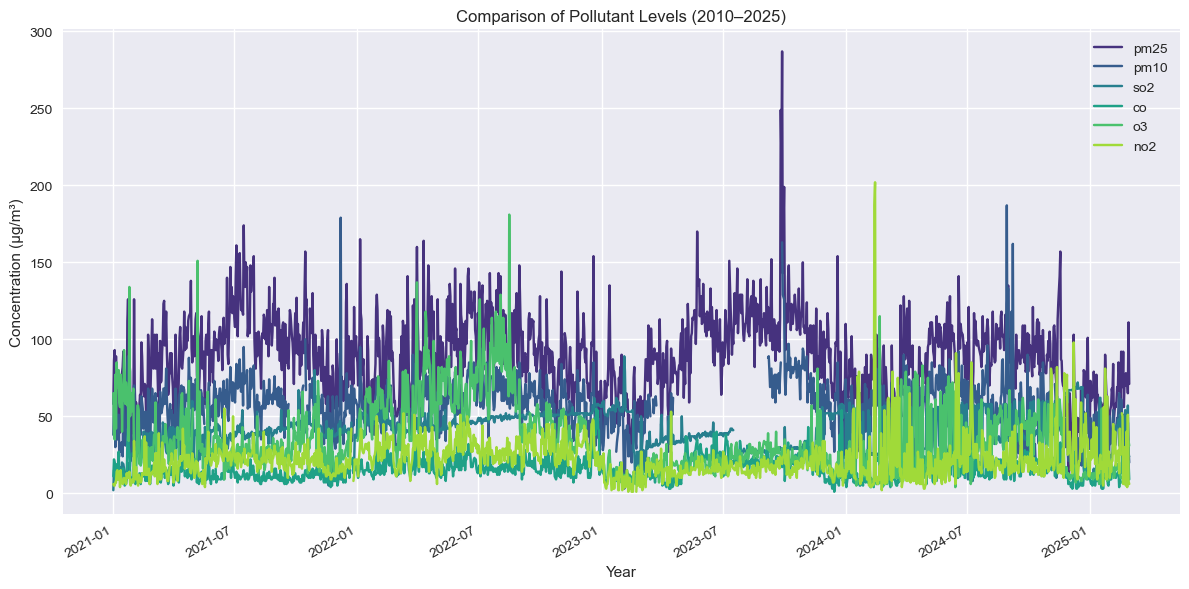

In [ ]:
pollutants = ['pm25', 'pm10', 'so2', 'co', 'o3', 'no2']
df[pollutants].plot(figsize=(12,6))
plt.title('Comparison of Pollutant Levels (2010–2025)')
plt.ylabel('Concentration (µg/m³)')
plt.xlabel('Year')
plt.legend()
plt.tight_layout()
plt.savefig('project_data/visuals/pollutant_comparison.png', dpi=300)
plt.show()




### Observation:
While PM2.5 remains the dominant health risk, secondary pollutants like **NO₂** (vehicle emissions) and **O₃** (photochemical smog) also show concerning increases in certain years.


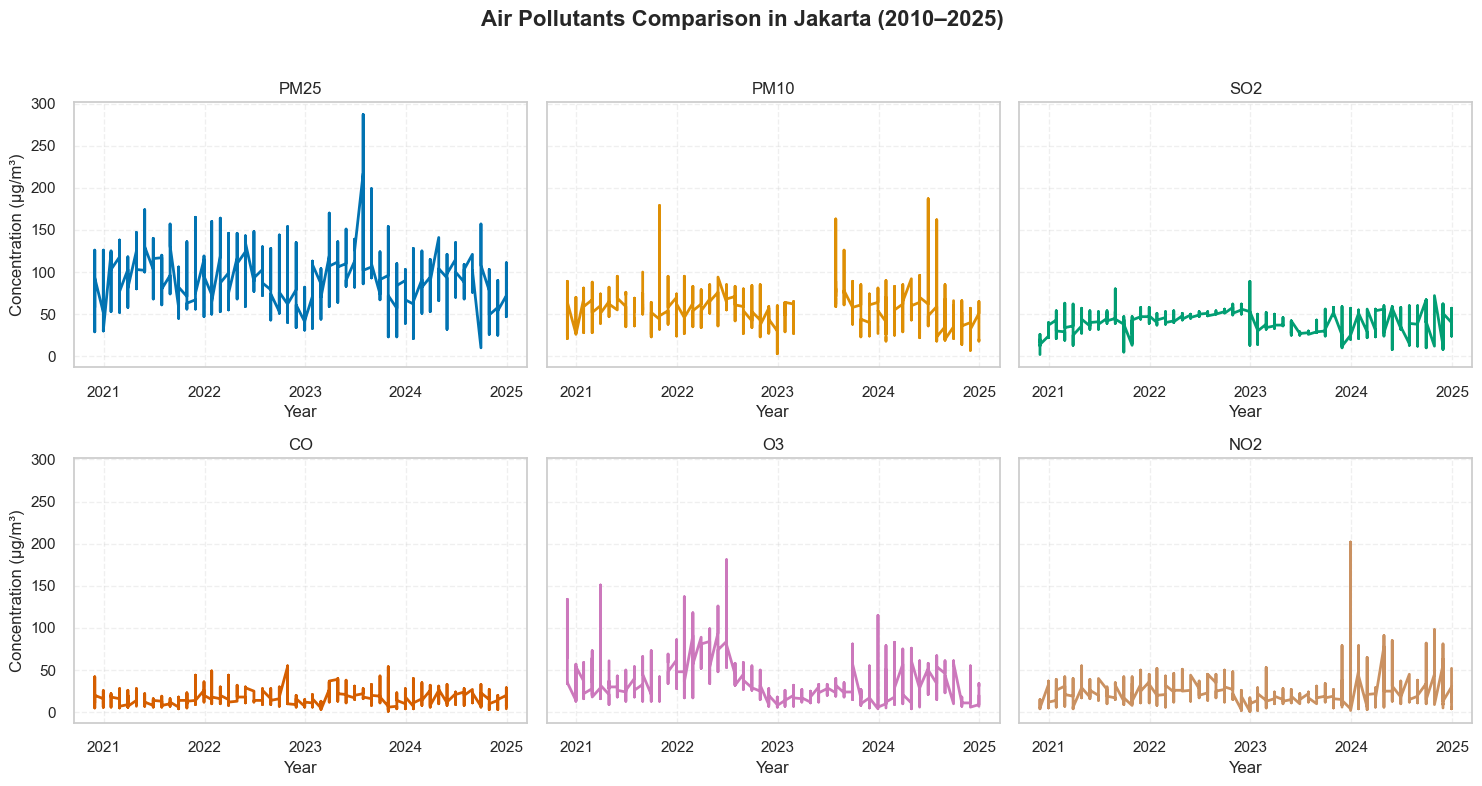

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

pollutants = ['pm25', 'pm10', 'so2', 'co', 'o3', 'no2']

# Combine year and month to create datetime
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-01')
df = df.sort_values('date')

sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2, 3, figsize=(15, 8), sharey=True)

for ax, pollutant in zip(axes.flat, pollutants):
    ax.plot(df['date'], df[pollutant],
            color=sns.color_palette("colorblind")[pollutants.index(pollutant)],
            linewidth=2)
    ax.set_title(pollutant.upper(), fontsize=12)
    ax.set_xlabel("Year")
    import matplotlib.dates as mdates
    # Format x-axis ticks to show year only
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.xaxis.set_major_locator(mdates.YearLocator(1,2,3))

    ax.grid(True, linestyle="--", alpha=0.3)

for row in range(2):  # for both rows
    axes[row, 0].set_ylabel("Concentration (µg/m³)")

fig.suptitle("Air Pollutants Comparison in Jakarta (2010–2025)", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('project_data/visuals/pollutant_subplots.png', dpi=300)
plt.show()

